In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
derecho_calls = gpd.read_file('../data/911_Phone Calls_Derecho_050320_050420.csv')

In [3]:
tornado_calls = gpd.read_file('../data/911_Phone_Calls_tornado_030320.csv')

In [4]:
derecho_dispatch = pd.read_csv('../data/cadd_derecho.csv', skiprows = 2)

In [5]:
tornado_dispatch = pd.read_csv('../data/cadd_tornado.csv', skiprows = 2)

In [6]:
damage_points = gpd.read_file('../data/damage_points.geojson')
path_polygons = gpd.read_file('../data/path_polygons.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [7]:
derecho_calls.head(2)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,None
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,None


In [8]:
derecho_calls.tail(2)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
1547,5/4/2020 0:29,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,None
1548,5/4/2020 0:29,911 Calls,,,2014 QUAIL HOLLOW CIR,None


In [9]:
tornado_calls.head(2)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,None
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,None


In [10]:
tornado_calls.tail(2)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,None
474,3/3/2020 4:58,911 Calls,36.276566,-86.799417,4884 LICKTON PIKE - SE,None


In [11]:
derecho_dispatch.head(2)

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD


In [12]:
tornado_dispatch.head(2)

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [13]:
print(damage_points.crs)
damage_points.head(2)

epsg:4326


,objectid,stormdate,surveydate,event_id,damage,damage_txt,dod_txt,efscale,damage_dir,windspeed,...,device_id,qc,dod,surveytype,globalid,edit_user,edit_time,comments,path_guid,geometry
0,2047717,1583218620000,1583335680000,Mount Juliet,2,One- or Two-Family Residences (FR12),All walls collapsed,EF3,N/A,155,...,None,Y,9,None,{FE82BBAC-ABF8-4562-81F6-A527829FBFFE},None,None,none,None,POINT (-86.51628 36.18344)
1,2047909,1583221860000,1583437860000,Cookeville,27,Trees: Hardwood (TH),Trees uprooted,EF0,N/A,80,...,None,Y,3,None,{2417B433-0C00-4D6C-A059-45E0CFDA2AF6},None,None,none,None,POINT (-85.60552 36.17308)


In [14]:
print(path_polygons.crs)
path_polygons.head(2)

epsg:4326


,efscale,geometry
0,EF3,"POLYGON ((-85.59922 36.17660, -85.59840 36.176..."
1,EF1,"POLYGON ((-85.52390 36.17189, -85.52430 36.171..."


In [15]:
print(tornado_paths.crs)
tornado_paths.head(2)

epsg:4326


,objectid,event_id,stormdate,starttime,endtime,startlat,startlon,endlat,endlon,length,...,propdamage,edit_user,edit_time,created_user,created_date,last_edited_user,last_edited_date,comments,Shape__Length,geometry
0,879879,Nashville,1583217120000,1583217120000,1583220900000,36.1725,-86.9478,36.1532,-85.8860,60.1317,...,-99,None,None,DATians,1583461561000,dat_editor,1618703241000,"An historic, long-track, strong EF-3 tornado b...",1.071075,"LINESTRING (-86.94783 36.17249, -86.94461 36.1..."
1,879077,Hwy 69 Ballpark Tornado,1583237040000,1583237040000,1583237520000,32.6846,-87.6226,32.6863,-87.5492,4.3400,...,-99,None,None,DATians,1583353305000,DATians,1583358165000,None,0.074159,"LINESTRING (-87.62263 32.68464, -87.62182 32.6..."


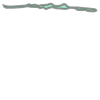

In [16]:
path_polygons.loc[0, 'geometry']

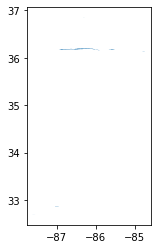

In [17]:
path_polygons.plot();

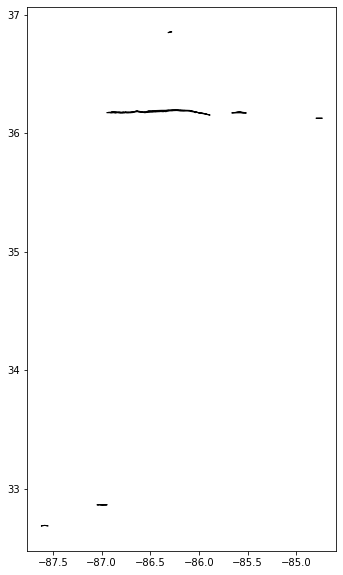

In [18]:
leg_kwds = {'title': 'path_polygons', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 2}

path_polygons.plot(column = 'efscale', figsize = (10, 10),
         edgecolor = 'black',
         legend = False,
         cmap = 'tab20')
plt.show()

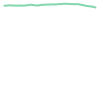

In [19]:
tornado_paths.loc[0, 'geometry']

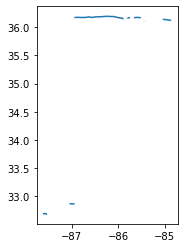

In [20]:
tornado_paths.plot();

In [21]:
area_center = (36.17000, -86.78000)

In [22]:
stormPalette = {'T': 'green',
               'D': 'magenta',
               'P': 'yellow'}

stormPalette

{'T': 'green', 'D': 'magenta', 'P': 'yellow'}

In [37]:
map_tornado = folium.Map(location =  area_center, zoom_start = 12)


folium.GeoJson(tornado_paths, style_function = lambda x: {'color':'#00FF00', 'fillColor': '#00FF00'}).add_to(map_tornado)
#folium.GeoJson(path_polygons).add_to(map_tornado)
#folium.GeoJson(damage_points).add_to(map_tornado)



map_tornado